# Customer Churn Analysis

Customer Churn Data Description:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.



Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

### Here we will have to predict the customer will churn or not

### Here we start the project by importing essential Libraries for Importing Datasets, EDA, Data Cleaning, Model Building, Removing Outliers 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, power_transform, StandardScaler, MinMaxScaler
from scipy.stats import boxcox, yeojohnson, zscore
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve, auc
from xgboost import XGBClassifier, XGBRFClassifier

as we have imported all the essential libraries now lets import our dataset and save it in our local variable ds we will import dataset using pandas.read_csv()

In [2]:
ds = pd.read_csv("~/Desktop/Datatrained/Customer Churn Analysis/Telecom_customer_churn.csv")

from above we can see that we have imported the data and saved it in our ds variable lets see at the data now by using ds.head() it will show us the first 5 rows of the columns

In [3]:
ds.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


from above we can see that there are total 21 columns in the dataset and most of them are object type now lets look at more information about the data using ds.info()

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


from above we can see that there are 18 object type variable, 2 int64 and 1 float64 type variable

there are total 7043 rows and 21 columns and by looking at the above set we can see every column has the same row count so there is no missing values in the datsaet

lets now see if there is any missing values in the dataset or not using ds.isnull().sum()

In [5]:
ds.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

lets see visualization of this using heatmap

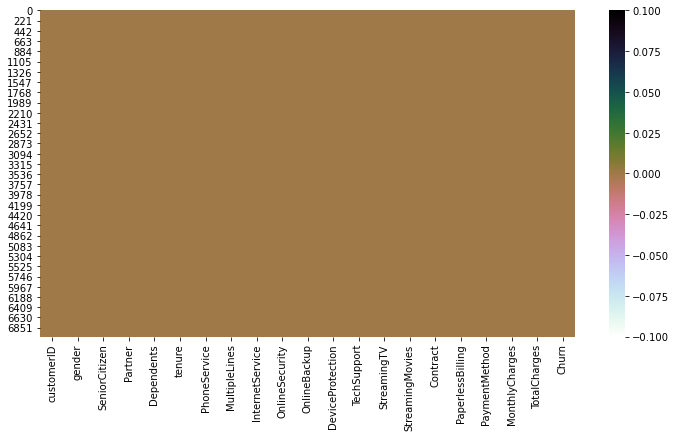

In [6]:
plt.figure(figsize = (12,6))
sns.heatmap(ds.isnull(), cmap='cubehelix_r')

from above we can see that there is only one color in the heatmap so there is no missing value in the dataset

from above we can see that there is no missing values in the dataset lets not look at the value count for all the varibale in the dataset using value_counts() method

In [7]:
for i in ds.columns:
    print(ds[i].value_counts())
    print('\n')

7359-WWYJV    1
3810-PJUHR    1
8648-PFRMP    1
4692-NNQRU    1
3620-EHIMZ    1
             ..
5529-GIBVH    1
4378-MYPGO    1
4627-MIHJH    1
1777-JYQPJ    1
7047-FWEYA    1
Name: customerID, Length: 7043, dtype: int64


Male      3555
Female    3488
Name: gender, dtype: int64


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No         

from above we can see the value counts for each column and there is no missing values here too so the data is clean

lets now see the Stastical description of the data using ds.describe

In [8]:
ds.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


from above we can see that the numeric column mean and standard deviation are in same range so there is no outliers we will check it later if there are outliers or not using. boxplot

lets visualize description of the dataset using heatmap

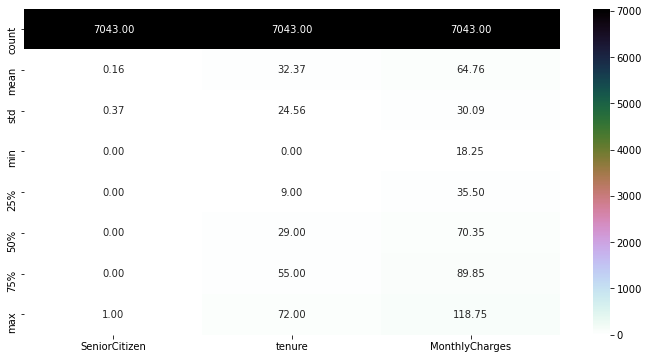

In [9]:
plt.figure(figsize = (12,6))
sns.heatmap(ds.describe(), cmap = 'cubehelix_r', annot = True, fmt='.2f')

from above we can see that all the values of these three columns are in the same range

lets now see the shape of the dataset using ds.shape

In [10]:
r, c = ds.shape
print("Number of rows are {} and columns are {}".format(r, c))

Number of rows are 7043 and columns are 21


from above we can see that there are 7043 rows and 21 columns as mentioned above in ds.info()

lets now see the names of the columns using ds.columns

In [11]:
ds.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

lets now see unique values in the dataset using ds.nunique()

In [12]:
ds.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

from above we can see that there are 7043 unique values in the customerID column we will drop this column as it is not important to us to predict the churn

lets now see the covariance of the dataset using ds.cov()

In [13]:
ds.cov()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,0.135875,0.149978,2.442062
tenure,0.149978,603.168108,183.196987
MonthlyCharges,2.442062,183.196987,905.410934


lets now plot these using heatmap

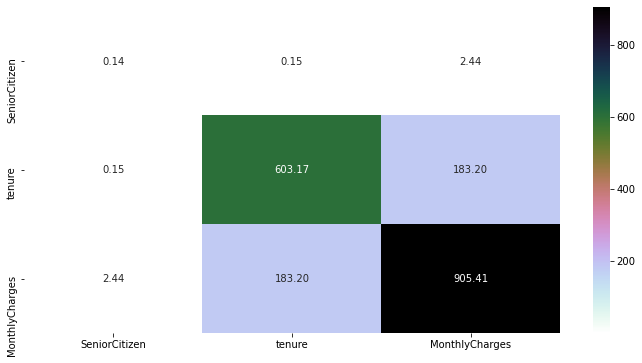

In [14]:
plt.figure(figsize = (12,6))
sns.heatmap(ds.cov(), annot = True, fmt='.2f', cmap='cubehelix_r')

from above we can see covariance between the columns

In [15]:
ds.drop('customerID',1,inplace=True)

In [16]:
ds.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


from above we can see that we have removed customerID column from the datset as it was not important to us

### Lets now start with EDA

Male      3555
Female    3488
Name: gender, dtype: int64


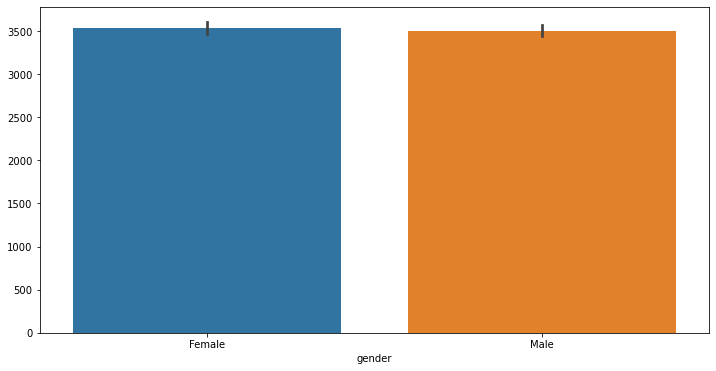

In [17]:
plt.figure(figsize = (12,6))
sns.barplot(ds['gender'], ds.index)
print(ds['gender'].value_counts())

from above we can see that there are 3488 Female and 3555 male in datset 

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


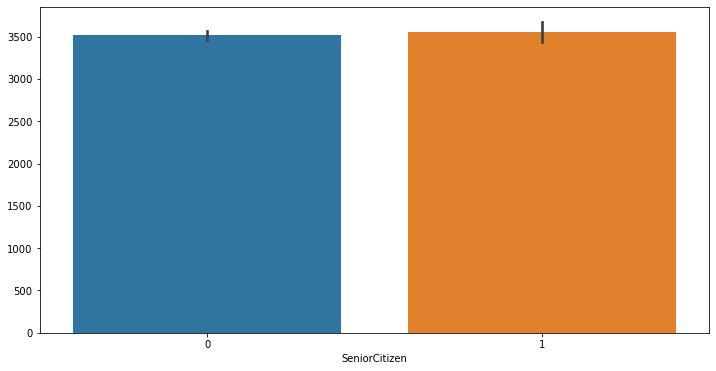

In [18]:
plt.figure(figsize = (12,6))
sns.barplot(ds['SeniorCitizen'], ds.index)
print(ds['SeniorCitizen'].value_counts())

from above we can see that there are 1142 Senior Citizen in the dataset

No     3641
Yes    3402
Name: Partner, dtype: int64


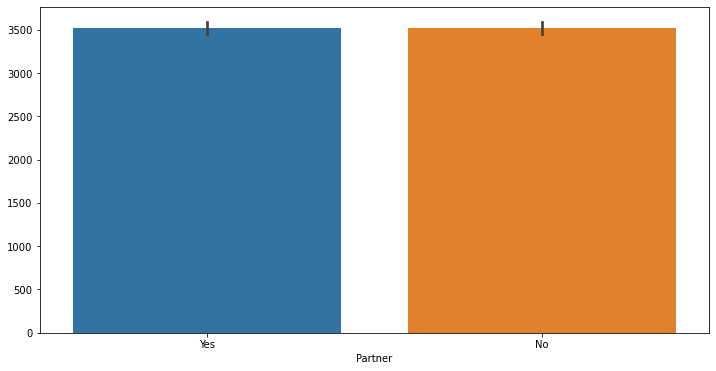

In [19]:
plt.figure(figsize = (12,6))
sns.barplot(ds['Partner'], ds.index)
print(ds['Partner'].value_counts())

from above we can see that there are 3402 customer with Partner in the same Telecom company

No     4933
Yes    2110
Name: Dependents, dtype: int64


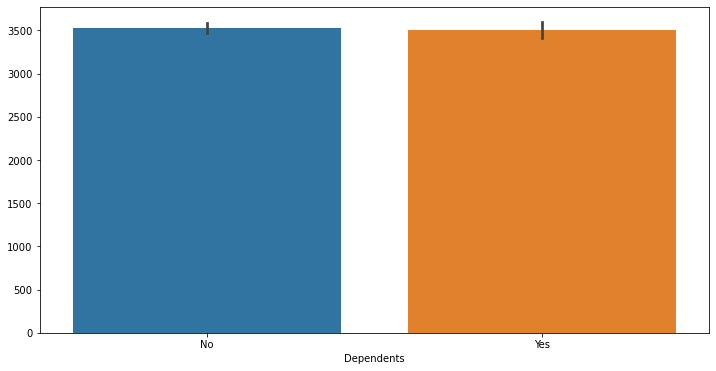

In [20]:
plt.figure(figsize = (12,6))
sns.barplot(ds['Dependents'], ds.index)
print(ds['Dependents'].value_counts())

from above we can see that there are 2110 customer who has dependents

Yes    6361
No      682
Name: PhoneService, dtype: int64


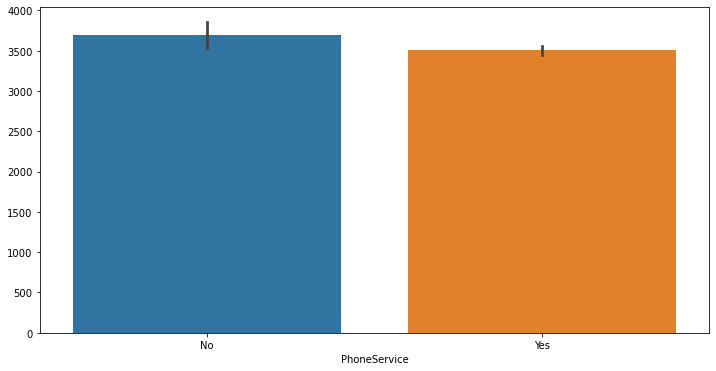

In [21]:
plt.figure(figsize = (12,6))
sns.barplot(ds['PhoneService'], ds.index)
print(ds['PhoneService'].value_counts())

we can see that from all the customers 6361 of them has taken phone service

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


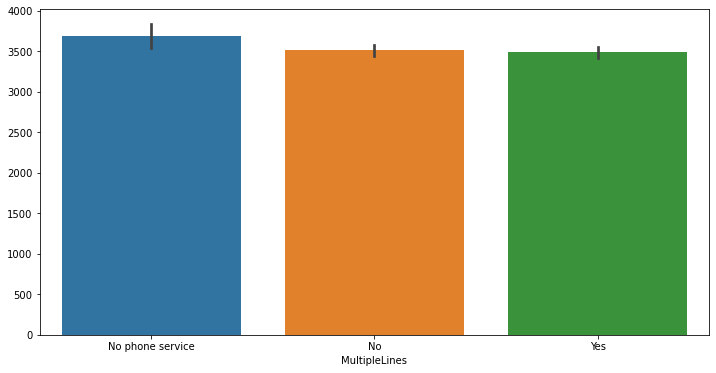

In [22]:
plt.figure(figsize = (12,6))
sns.barplot(ds['MultipleLines'], ds.index)
print(ds['MultipleLines'].value_counts())

from above we can see that there are 2971 people with multiple lines 3390 without multiple line and 682 of them don't have phone service

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


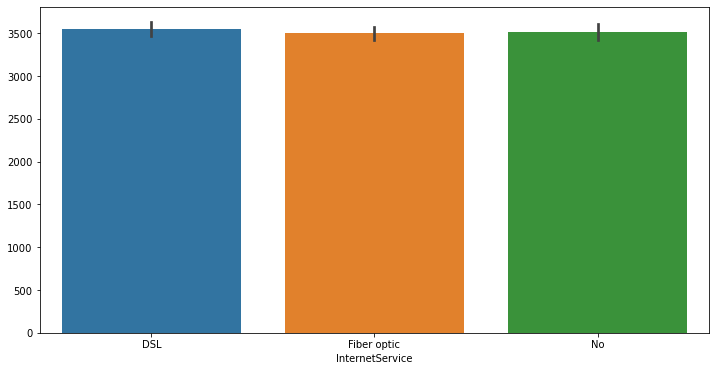

In [23]:
plt.figure(figsize = (12,6))
sns.barplot(ds['InternetService'], ds.index)
print(ds['InternetService'].value_counts())

from above we can see the type of Service the person is using most of them are usinf Fiber Optics after that 2421 people are using digital subscriber line and 1526 people haven't taken the internet service

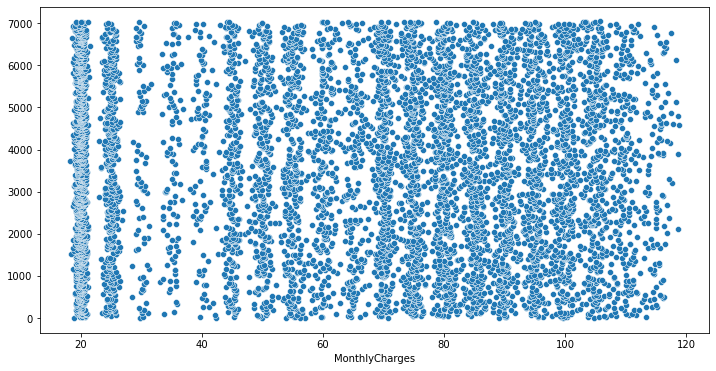

In [24]:
plt.figure(figsize = (12,6))
sns.scatterplot(ds['MonthlyCharges'], ds.index)

No     5174
Yes    1869
Name: Churn, dtype: int64


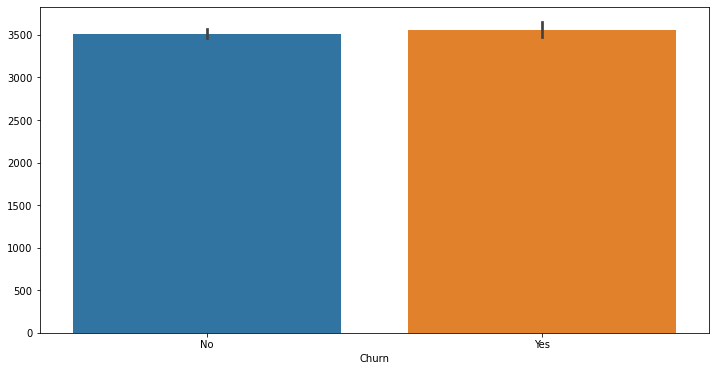

In [25]:
plt.figure(figsize = (12,6))
sns.barplot(ds['Churn'], ds.index)
print(ds['Churn'].value_counts())

from above we can see there are 1869 people who are leaving the service and 5174 who are staying with us

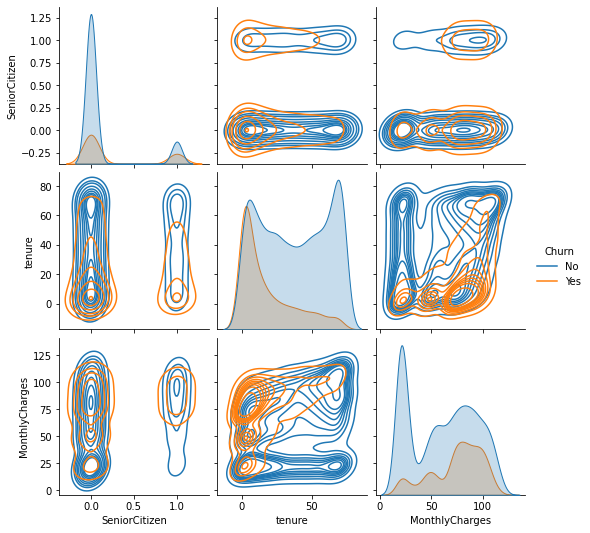

In [26]:
sns.pairplot(ds, hue='Churn', data = ds, kind = 'kde')

lets now do label encoding 

In [27]:
le = LabelEncoder()

In [28]:
ds.select_dtypes('object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [29]:
ds[ds.select_dtypes(include=['object']).columns]  = ds[ds.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [30]:
ds

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


from above we can see that we have successfully converted our dataset into numeric columns

lets now see the outliers in the dataset using boxplot of only two columns as rest of the columns were object type

In [31]:
col = ['tenure','MonthlyCharges']

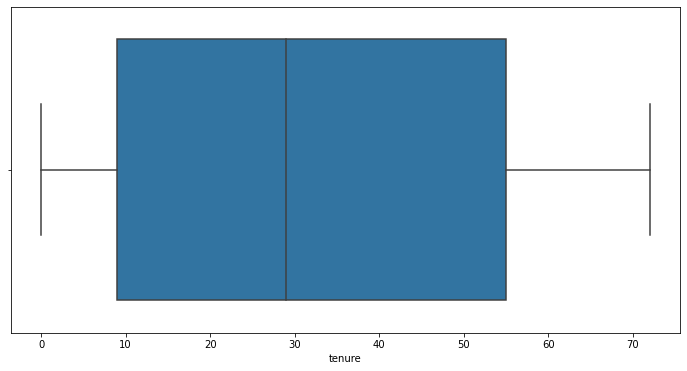

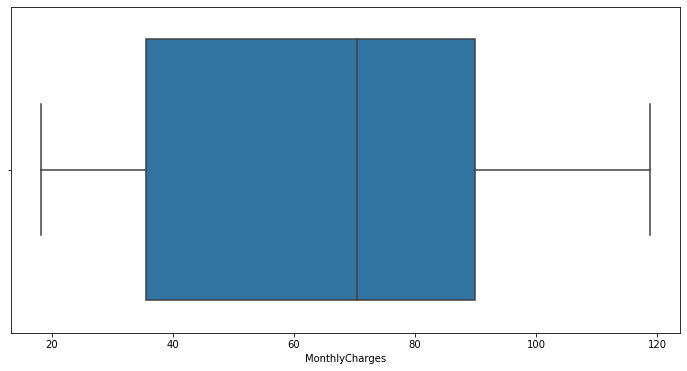

In [32]:
for c in col:
    plt.figure(figsize = (12,6))
    sns.boxplot(ds[c])

from above we can see that there are no outliers in the dataset so lets now see the skewness of data

In [33]:
for c in col:
    print(ds[c].skew())

0.2395397495619829
-0.22052443394398033


from above we can see the skewness is also under +/-0.5 so now we are ready to divide the dataset into two parts as independent and dependent variable

In [34]:
X = ds.drop('Churn', axis = 1)
Y = ds['Churn']

In [35]:
print(X.shape)
print(Y.shape)

(7043, 19)
(7043,)


In [36]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


now we will scale the X variable as they are not in the same range we will scale them using Min max scaler

In [37]:
mms = MinMaxScaler()
X_new = mms.fit(X)
X_new = mms.fit_transform(X)
X_new = pd.DataFrame(X_new, columns = X.columns)

In [38]:
X_new

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.383614
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.224502
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.024043
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.214395
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.141654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,0.333333,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.5,1.0,1.000000,0.662189,0.244564
7039,0.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.5,0.0,1.0,1.0,0.0,1.0,1.0,0.5,1.0,0.333333,0.845274,0.872588
7040,0.0,0.0,1.0,1.0,0.152778,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.112935,0.458499
7041,1.0,1.0,1.0,0.0,0.055556,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.558706,0.407351


from above we can see that now all the values are in the same range that is 0 to 1

lets now divide the two dataset into training and testing sets using train_test_split

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size = 0.22, random_state = 42)

Now we are choosing random state as 42 later we will find the best random state and we will fit all the models with that random state

mow lets see one model and find out the Accuracy score of that model

In [40]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
print("Training Score",lr.score(X_train, Y_train))

Training Score 0.8026579282723466


form above we can see the traning score is 79% lets now do the prediction and see what is the testing accuracy

In [41]:
predlr = lr.predict(X_test)
acclr = accuracy_score(Y_test, predlr)*100
print("Accuracy score:", acclr)
print("Classification Report:", classification_report(Y_test, predlr))
print("Confusion Matrix:", confusion_matrix(Y_test, predlr))

Accuracy score: 81.29032258064515
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1133
           1       0.69      0.55      0.61       417

    accuracy                           0.81      1550
   macro avg       0.77      0.73      0.74      1550
weighted avg       0.80      0.81      0.81      1550

Confusion Matrix: [[1031  102]
 [ 188  229]]


from above we can see that testing accuracy us 81% now lets find out the best random state 

In [42]:
models = [LogisticRegression(), DecisionTreeClassifier(), ExtraTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), SVC(), GaussianNB(), KNeighborsClassifier(), XGBClassifier(silent=0, verbosity = 0), XGBRFClassifier(silent=0, verbosity = 0)]

In [43]:
maxacc = 0
maxrs = 0
model = 0
for i in range(0,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size = 0.22, random_state = i)
    for m in models:
        m.fit(X_train, Y_train)
        pred = m.predict(X_test)
        acc = accuracy_score(Y_test, pred)
        if acc > maxacc:
            maxacc = acc
            maxrs = i
            model = m
            
print("Maximum Accuracy is {} at Random State {} for model {}".format(maxacc, maxrs, model))

Maximum Accuracy is 0.827741935483871 at Random State 158 for model LogisticRegression()


from above we can see that Logistic Regression has the heighest accuracy score of 83% at random_state 158 now lets find out the accuracy score for all the model at random_state 158

In [44]:
X = X_new

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 158)

## Model Building

In [46]:
print("Logistic Regression")
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predlr = lr.predict(X_test)
acclr = accuracy_score(Y_test, predlr)*100
print("Accuracy Score:", acclr)
print("Classification Score:", classification_report(Y_test, predlr))
print("Confusion Matrix:", confusion_matrix(Y_test, predlr))
scorelr = cross_val_score(lr, X, Y, cv = 5)
scorelr = scorelr.mean()*100
print("Cross Validation Score:", scorelr)
f1lr = f1_score(Y_test, predlr)*100
print("F1 Score:", f1_score(Y_test, predlr)*100)

Logistic Regression
Accuracy Score: 82.7741935483871
Classification Score:               precision    recall  f1-score   support

           0       0.84      0.94      0.89      1130
           1       0.76      0.54      0.63       420

    accuracy                           0.83      1550
   macro avg       0.80      0.74      0.76      1550
weighted avg       0.82      0.83      0.82      1550

Confusion Matrix: [[1057   73]
 [ 194  226]]
Cross Validation Score: 80.40628629266405
F1 Score: 62.865090403337966


In [47]:
print("Decision Tree")
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
predtc = dtc.predict(X_test)
accdtc = accuracy_score(Y_test, predtc)*100
print("Accuracy Score:", accdtc)
print("Classification Report", classification_report(Y_test, predtc))
print("Confusion Matrix", confusion_matrix(Y_test, predtc))
scoredtc = cross_val_score(dtc, X, Y, cv = 5)
scoredtc = scoredtc.mean()*100
print("Cross Validation Score:", scoredtc)
f1dtc = f1_score(Y_test, predtc)*100
print("F1 Score:", f1_score(Y_test, predtc)*100)

Decision Tree
Accuracy Score: 73.74193548387098
Classification Report               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1130
           1       0.52      0.46      0.49       420

    accuracy                           0.74      1550
   macro avg       0.66      0.65      0.65      1550
weighted avg       0.73      0.74      0.73      1550

Confusion Matrix [[951 179]
 [228 192]]
Cross Validation Score: 72.31286091038133
F1 Score: 48.54614412136536


In [48]:
print("Extra Tree Classifier")
etc = ExtraTreeClassifier()
etc.fit(X_train, Y_train)
predetc = etc.predict(X_test)
accetc = accuracy_score(Y_test, predetc)*100
print("Accuracy Score", accetc)
print("Classification Report:", classification_report(Y_test, predetc))
print("Confusion Matrix:", confusion_matrix(Y_test, predetc))
scoreetc = cross_val_score(etc, X, Y, cv = 5)
scoreetc = scoreetc.mean()*100
print("Cross validation score:", scoreetc)
f1etc = f1_score(Y_test, predetc)*100
print("F1 Score:", f1_score(Y_test, predetc)*100)

Extra Tree Classifier
Accuracy Score 73.67741935483872
Classification Report:               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1130
           1       0.52      0.48      0.50       420

    accuracy                           0.74      1550
   macro avg       0.66      0.66      0.66      1550
weighted avg       0.73      0.74      0.73      1550

Confusion Matrix: [[940 190]
 [218 202]]
Cross validation score: 72.58280776179109
F1 Score: 49.7536945812808


In [49]:
print("Random Forest")
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
predrfc = rfc.predict(X_test)
accrfc = accuracy_score(Y_test, predrfc)*100
print("Accuracy Score:", accrfc)
print("Classification Report", classification_report(Y_test, predrfc))
print("Confusion Matrix", confusion_matrix(Y_test, predrfc))
scorerfc = cross_val_score(rfc, X, Y, cv = 5)
scorerfc = scorerfc.mean()*100
print("Cross Validation Score:", scorerfc)
f1rfc = f1_score(Y_test, predrfc)*100
print("F1 Score:", f1_score(Y_test, predrfc))

Random Forest
Accuracy Score: 79.09677419354838
Classification Report               precision    recall  f1-score   support

           0       0.82      0.92      0.86      1130
           1       0.67      0.45      0.54       420

    accuracy                           0.79      1550
   macro avg       0.74      0.68      0.70      1550
weighted avg       0.78      0.79      0.78      1550

Confusion Matrix [[1038   92]
 [ 232  188]]
Cross Validation Score: 78.97218167301116
F1 Score: 0.5371428571428571


In [50]:
print("AdaBoost Classifier")
adb = AdaBoostClassifier()
adb.fit(X_train, Y_train)
predadb = adb.predict(X_test)
accadb = accuracy_score(Y_test, predadb)*100
print("Accuracy Score:", accadb)
print("Classification Report", classification_report(Y_test, predadb))
print("Confusion Report", confusion_matrix(Y_test, predadb))
scoreadb = cross_val_score(adb, X, Y, cv = 5)
scoreadb = scoreadb.mean()*100
print("Cross Validation Score:", scoreadb)
f1adb = f1_score(Y_test, predadb)*100
print("F1 Score:", f1_score(Y_test, predadb))

AdaBoost Classifier
Accuracy Score: 81.2258064516129
Classification Report               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1130
           1       0.71      0.52      0.60       420

    accuracy                           0.81      1550
   macro avg       0.77      0.72      0.74      1550
weighted avg       0.80      0.81      0.80      1550

Confusion Report [[1042   88]
 [ 203  217]]
Cross Validation Score: 80.2499253984128
F1 Score: 0.5986206896551725


In [51]:
print("SVC")
svc = SVC()
svc.fit(X_train, Y_train)
predsvc = svc.predict(X_test)
accsvc = accuracy_score(Y_test, predsvc)*100
print("Accuracy Score:", accsvc)
print("Classification Report:", classification_report(Y_test, predsvc))
print("Confusion Matrix:", confusion_matrix(Y_test, predsvc))
scoresvc = cross_val_score(svc, X, Y, cv = 5)
scoresvc = scoresvc.mean()*100
print("Cross Validation Score:", scoresvc)
f1svc = f1_score(Y_test, predsvc)*100
print("F1 Score:", f1_score(Y_test, predsvc))

SVC
Accuracy Score: 80.70967741935485
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.94      0.88      1130
           1       0.74      0.44      0.55       420

    accuracy                           0.81      1550
   macro avg       0.78      0.69      0.72      1550
weighted avg       0.80      0.81      0.79      1550

Confusion Matrix: [[1065   65]
 [ 234  186]]
Cross Validation Score: 79.96614700948449
F1 Score: 0.5543964232488823


In [52]:
print("Gaussian NB")
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
predgnb = gnb.predict(X_test)
accgnb = accuracy_score(Y_test, predgnb)*100
print("Accuracy Score:", accgnb)
print("Classification Report:", classification_report(Y_test, predgnb))
print("Confusion Matrix:", confusion_matrix(Y_test, predgnb))
scoregnb = cross_val_score(gnb, X, Y, cv = 5)
scoregnb = scoregnb.mean()*100
print("Cross Validation Score:", scoregnb)
f1gnb = f1_score(Y_test, predgnb)*100
print("F1 Score:", f1_score(Y_test, predgnb))

Gaussian NB
Accuracy Score: 78.0
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.80      0.84      1130
           1       0.57      0.73      0.64       420

    accuracy                           0.78      1550
   macro avg       0.73      0.76      0.74      1550
weighted avg       0.80      0.78      0.79      1550

Confusion Matrix: [[902 228]
 [113 307]]
Cross Validation Score: 75.5501867055939
F1 Score: 0.642931937172775


In [53]:
print("KNeighbours")
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predknn = knn.predict(X_test)
accknn = accuracy_score(Y_test, predknn)*100
print("Accuracy Score:", accknn)
print("Classification Score:", classification_report(Y_test, predknn))
print("Confusion Matrix:", confusion_matrix(Y_test, predknn))
scoreknn = cross_val_score(knn, X, Y, cv = 5)
scoreknn = scoreknn.mean()*100
print("Cross Validation Score:", scoreknn)
f1knn = f1_score(Y_test, predknn)*100
print("F1 Score:", f1_score(Y_test, predknn))

KNeighbours
Accuracy Score: 74.90322580645162
Classification Score:               precision    recall  f1-score   support

           0       0.80      0.87      0.83      1130
           1       0.55      0.43      0.48       420

    accuracy                           0.75      1550
   macro avg       0.68      0.65      0.66      1550
weighted avg       0.73      0.75      0.74      1550

Confusion Matrix: [[979 151]
 [238 182]]
Cross Validation Score: 74.75512533066649
F1 Score: 0.48339973439575035


In [54]:
print("XGBoost")
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
predxgb = xgb.predict(X_test)
accxgb = accuracy_score(Y_test, predxgb)*100
print("Accuracy Score:", accxgb)
print("Classification Report", classification_report(Y_test, predxgb))
print("Confusion Matrix:", confusion_matrix(Y_test, predxgb))
scorexgb = cross_val_score(xgb ,X, Y, cv = 5)
scorexgb = scorexgb.mean()*100
print("Cross Validation Score:", scorexgb)
f1xgb = f1_score(Y_test, predxgb)*100
print("F1 Score:", f1_score(Y_test, predxgb)*100)

XGBoost
Accuracy Score: 79.54838709677419
Classification Report               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1130
           1       0.66      0.50      0.57       420

    accuracy                           0.80      1550
   macro avg       0.75      0.70      0.72      1550
weighted avg       0.78      0.80      0.79      1550

Confusion Matrix: [[1021  109]
 [ 208  212]]
Cross Validation Score: 78.26220643267308
F1 Score: 57.21997300944669


In [55]:
print("XGRFClassifier")
xgbrfc = XGBRFClassifier()
xgbrfc.fit(X_train, Y_train)
predxgbrfc = xgbrfc.predict(X_test)
accxgbrfc = accuracy_score(Y_test, predxgbrfc)*100
print("Accuracy Score", accxgbrfc)
print("Classification Report:", classification_report(Y_test, predxgbrfc))
print("Confusion Matrix:", confusion_matrix(Y_test, predxgbrfc))
scorexgbrfc = cross_val_score(xgbrfc, X, Y, cv =5)
scorexgbrfc = scorexgbrfc.mean()*100
print("Cross Validation Score:", scorexgbrfc)
f1xgbrfc = f1_score(Y_test, predxgbrfc)*100
print("F1 Score:", f1_score(Y_test, predxgbrfc))

XGRFClassifier
Accuracy Score 81.29032258064515
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.93      0.88      1130
           1       0.73      0.49      0.59       420

    accuracy                           0.81      1550
   macro avg       0.78      0.71      0.73      1550
weighted avg       0.80      0.81      0.80      1550

Confusion Matrix: [[1054   76]
 [ 214  206]]
Cross Validation Score: 79.99439479966449
F1 Score: 0.586894586894587


In [56]:
Compare = {
    'Model Name':['LogisticRegression', 'Decision Tree','Extra Tree', 'Random Forest','AdaBoost', 'SVC', 'Gaussian NB', 'KNeighbours', 'XGBoost', 'XGBRFClassifier'],
    'Accuracy Score':[acclr, accdtc, accetc, accrfc, accadb, accsvc, accgnb, accknn, accxgb, accxgbrfc],
    'Cross Validation Score':[scorelr ,scoredtc, scoreetc, scorerfc, scoreadb, scoresvc, scoregnb, scoreknn, scorexgb, scorexgbrfc],
    'Accuracy Score - Cross Validation Score':[acclr-scorelr, accdtc-scoredtc, accetc-scoreetc, accrfc-scorerfc, accadb-scoreadb ,accsvc-scoresvc, accgnb-scoregnb, accknn- scoreknn, accxgb-scorexgb, accxgbrfc-scorexgbrfc],
    'F1 Score':[f1lr, f1dtc, f1etc, f1rfc, f1adb, f1svc, f1gnb, f1knn, f1xgb, f1xgbrfc]
}

lets convert this dictionary to DataFrame so that we can see the differences easily

In [57]:
compare = pd.DataFrame.from_dict(Compare)

In [58]:
compare

,Model Name,Accuracy Score,Cross Validation Score,Accuracy Score - Cross Validation Score,F1 Score
0,LogisticRegression,82.774194,80.406286,2.367907,62.865090
1,Decision Tree,73.741935,72.312861,1.429075,48.546144
2,Extra Tree,73.677419,72.582808,1.094612,49.753695
3,Random Forest,79.096774,78.972182,0.124593,53.714286
4,AdaBoost,81.225806,80.249925,0.975881,59.862069
5,SVC,80.709677,79.966147,0.743530,55.439642
6,Gaussian NB,78.000000,75.550187,2.449813,64.293194
7,KNeighbours,74.903226,74.755125,0.148100,48.339973
8,XGBoost,79.548387,78.262206,1.286181,57.219973
9,XGBRFClassifier,81.290323,79.994395,1.295928,58.689459


As this is a classification model we also have to look at F1 Score

In [59]:
parameterlr = {
    'penalty':['l1','l2','elasticnet','None'],
    'C':[1,2,3,4],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'n_jobs':[1,2,3,4]
}

In [60]:
parametergnb = {
    'priors': [None],
    'var_smoothing': [0.00000001, 0.000000001, 0.00000001]
}

In [61]:
gscvlr = GridSearchCV(lr, parameterlr)
gscvgnb = GridSearchCV(gnb, parametergnb)

In [62]:
gscvlr.fit(X_train, Y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4], 'n_jobs': [1, 2, 3, 4],
                         'penalty': ['l1', 'l2', 'elasticnet', 'None'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [63]:
gscvgnb.fit(X_train, Y_train)

GridSearchCV(estimator=GaussianNB(),
             param_grid={'priors': [None],
                         'var_smoothing': [1e-08, 1e-09, 1e-08]})

In [64]:
gscv_predictlr = gscvlr.best_estimator_.predict(X_test)

In [65]:
gscv_predictgnb = gscvgnb.best_estimator_.predict(X_test)

In [66]:
print("Logistic Regression")
accglr = accuracy_score(Y_test, gscv_predictlr)*100
print("Accuracy Score after GridSearchCV:", accglr)
print("Classification Report:", classification_report(Y_test, gscv_predictlr))
print("Confusion Matrix:", confusion_matrix(Y_test, gscv_predictlr))
print("F1 Score:", f1_score(Y_test, gscv_predictlr)*100)

Logistic Regression
Accuracy Score after GridSearchCV: 82.51612903225806
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.93      0.89      1130
           1       0.75      0.53      0.62       420

    accuracy                           0.83      1550
   macro avg       0.80      0.73      0.75      1550
weighted avg       0.82      0.83      0.81      1550

Confusion Matrix: [[1055   75]
 [ 196  224]]
F1 Score: 62.30876216968011


In [67]:
print("Gaussian NB")
accggnb = accuracy_score(Y_test, gscv_predictgnb)*100
print("Accuracy Score:", accggnb)
print("Classification Report:", classification_report(Y_test, gscv_predictgnb))
print("Confusion Matrix:", confusion_matrix(Y_test, gscv_predictgnb))
print("F1 Score:", f1_score(Y_test, gscv_predictgnb)*100)

Gaussian NB
Accuracy Score: 78.0
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.80      0.84      1130
           1       0.57      0.73      0.64       420

    accuracy                           0.78      1550
   macro avg       0.73      0.76      0.74      1550
weighted avg       0.80      0.78      0.79      1550

Confusion Matrix: [[902 228]
 [113 307]]
F1 Score: 64.2931937172775


from here we see that Gaussian NB is performing better as it is important for us to find out the customer who us going to Churn

lets now see AUC ROC Curve and save our best model

In [68]:
fpr, tpr, thresholds = roc_curve(Y_test, gscv_predictlr)
roc_auc = auc(fpr, tpr)
fpr1, tpr1, thresholds = roc_curve(Y_test, gscv_predictgnb)
roc_auc1 = auc(fpr1, tpr1)

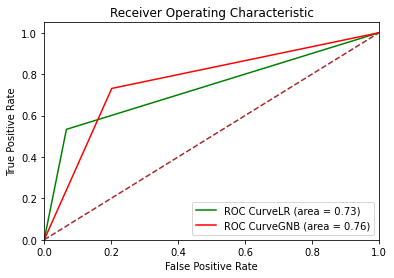

In [69]:
plt.figure()
plt.plot(fpr, tpr, color='green', label = "ROC CurveLR (area = %0.2f)" %roc_auc)
plt.plot(fpr1, tpr1, color='red', label = "ROC CurveGNB (area = %0.2f)" %roc_auc1)
plt.plot([0,1],[0,1], color='brown', linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")

## from above we can see that GaussianNB is measuring the performance across all possible classification thresholds with an Area under Curve of 76% so we are choosing this model as our final model

In [70]:
joblib.dump(gscvgnb.best_estimator_, 'CustomerChurnAnalysis.pkl')

['CustomerChurnAnalysis.pkl']

### from using the CustomerChurnAnalysis.pkl file we can predict another dataset with same columns